In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sp 

In [21]:
df = pd.read_csv("C:/Users/LENOVO/Desktop/jobsindata.csv")

In [22]:
df.dtypes

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

In [23]:
print(df.columns)

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')


In [24]:
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [25]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
9350    False
9351    False
9352    False
9353    False
9354    False
Length: 9355, dtype: bool


In [26]:
job_title_counts = df['job_title'].value_counts()
experience_level_counts = df['experience_level'].value_counts()
employment_type_counts = df['employment_type'].value_counts()
print("Job Title Distribution:")
print(job_title_counts)
print("\nExperience Level Distribution:")
print(experience_level_counts)
print("\nEmployment Type Distribution:")
print(employment_type_counts)

Job Title Distribution:
job_title
Data Engineer                     2195
Data Scientist                    1989
Data Analyst                      1388
Machine Learning Engineer          991
Applied Scientist                  272
                                  ... 
Consultant Data Engineer             1
Sales Data Analyst                   1
Managing Director Data Science       1
AWS Data Architect                   1
Deep Learning Researcher             1
Name: count, Length: 125, dtype: int64

Experience Level Distribution:
experience_level
Senior         6709
Mid-level      1869
Entry-level     496
Executive       281
Name: count, dtype: int64

Employment Type Distribution:
employment_type
Full-time    9310
Contract       19
Part-time      15
Freelance      11
Name: count, dtype: int64


<Axes: xlabel='experience_level'>

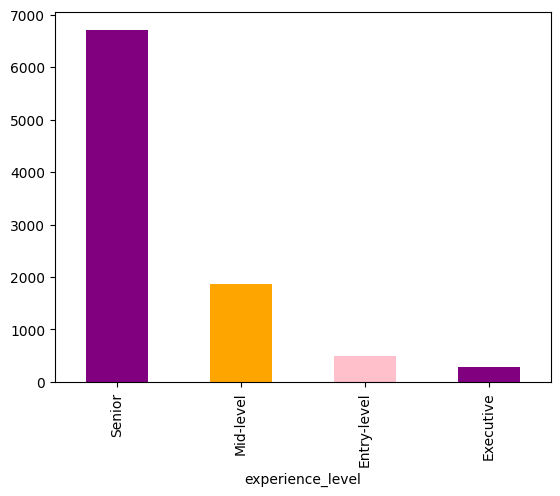

In [27]:
# Create bar charts for categorical variables
experience_level_counts.plot(kind='bar', color=['purple', 'orange', 'pink'])



<Axes: xlabel='employment_type'>

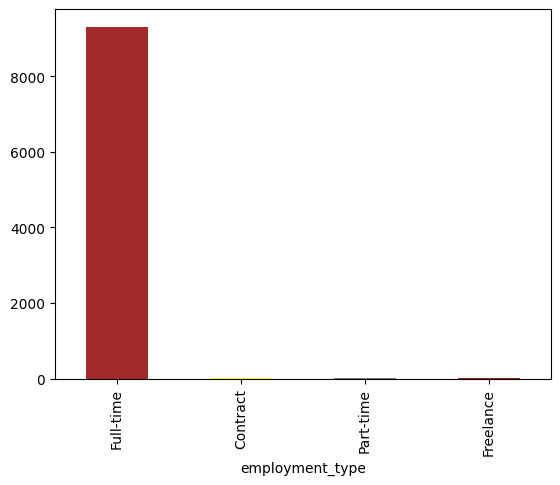

In [28]:
# Create bar charts for categorical variables
employment_type_counts.plot(kind='bar', color=['brown', 'yellow', 'gray'])

In [29]:
employment_type_counts

employment_type
Full-time    9310
Contract       19
Part-time      15
Freelance      11
Name: count, dtype: int64

In [30]:
# Identify outliers using IQR
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[df['salary'] < lower_bound]

# Print outliers
print(outliers)


Empty DataFrame
Columns: [work_year, job_title, job_category, salary_currency, salary, salary_in_usd, employee_residence, experience_level, employment_type, work_setting, company_location, company_size]
Index: []


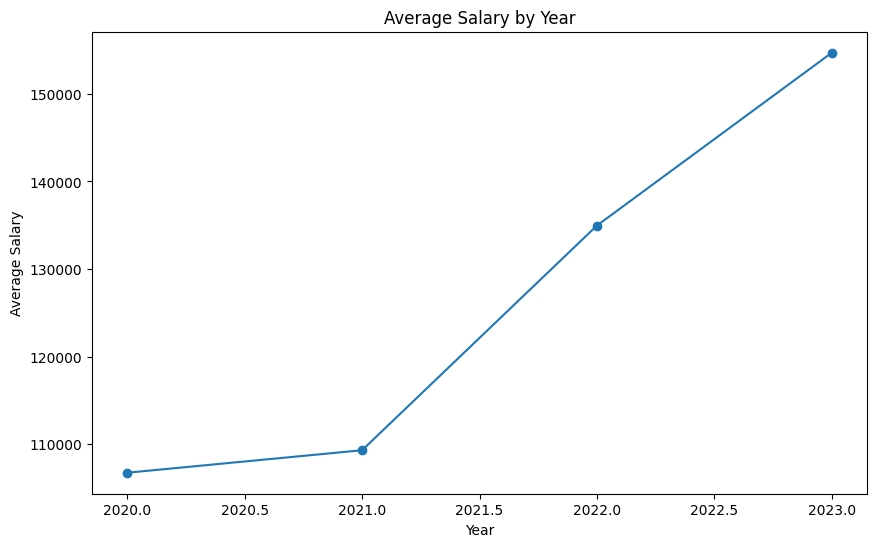

In [31]:
# Analyze salary trends by year
df_year = df.groupby('work_year')['salary'].mean()
plt.figure(figsize=(10, 6))
df_year.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.title('Average Salary by Year')
plt.show()

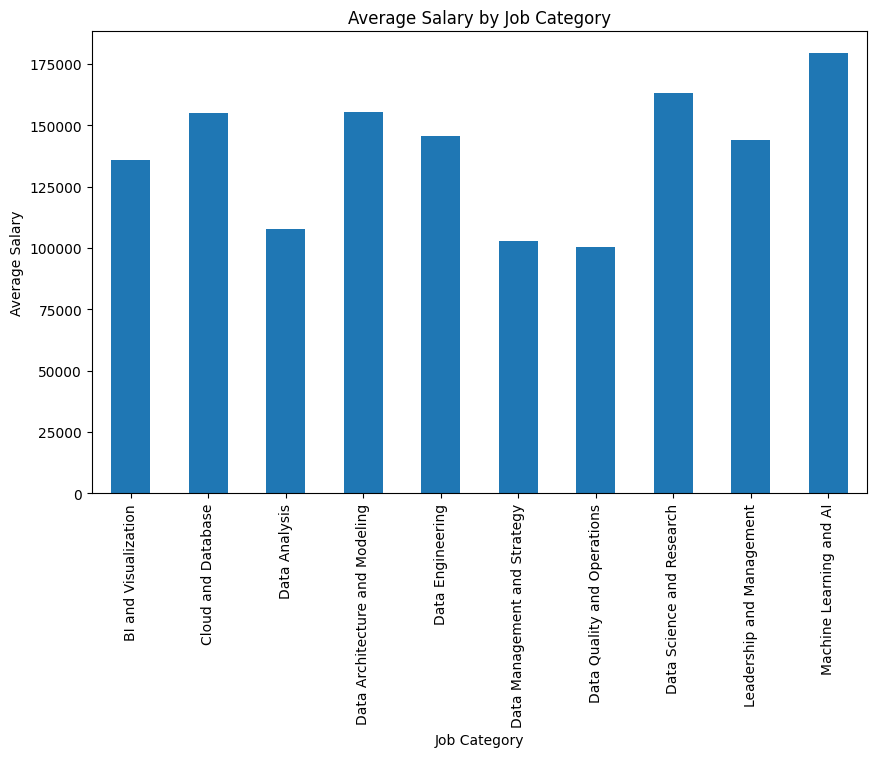

In [32]:
# Analyze salary trends by job category
df_category = df.groupby('job_category')['salary'].mean()
plt.figure(figsize=(10, 6))
df_category.plot(kind='bar')
plt.xlabel('Job Category')
plt.ylabel('Average Salary')
plt.title('Average Salary by Job Category')
plt.show()

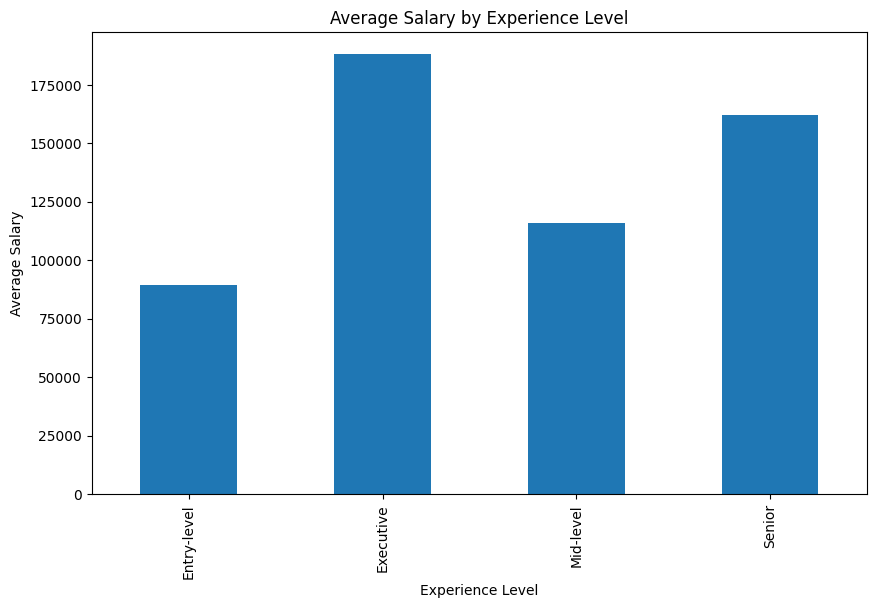

In [33]:
# Analyze salary trends by experience level
df_experience = df.groupby('experience_level')['salary'].mean()
plt.figure(figsize=(10, 6))
df_experience.plot(kind='bar')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.title('Average Salary by Experience Level')
plt.show()

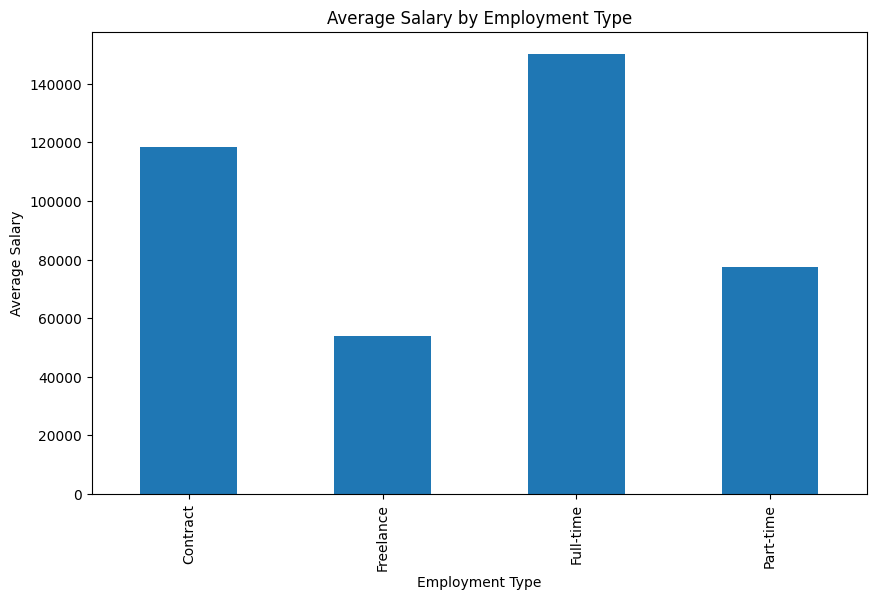

In [34]:
# Analyze salary trends by employment type
df_employment = df.groupby('employment_type')['salary'].mean()
plt.figure(figsize=(10, 6))
df_employment.plot(kind='bar')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary')
plt.title('Average Salary by Employment Type')
plt.show()

In [35]:
# Calculate average salaries
average_salaries = df.groupby('job_title')['salary'].mean()

# Identify top-paying jobs
top_paying_jobs = average_salaries.nlargest(1)

# Identify lowest-paying jobs
lowest_paying_jobs = average_salaries.nsmallest(1)

# Print average salaries, top-paying jobs, and lowest-paying jobs
print("Average Salaries:")
print(average_salaries)
print("\nTop-Paying Jobs:")
print(top_paying_jobs)
print("\nLowest-Paying Jobs:")
print(lowest_paying_jobs)

Average Salaries:
job_title
AI Architect                       249000.000000
AI Developer                       140500.000000
AI Engineer                        169208.416667
AI Programmer                       74000.000000
AI Research Engineer                67275.000000
                                       ...      
Sales Data Analyst                  60000.000000
Software Data Engineer             120000.000000
Staff Data Analyst                  84999.333333
Staff Data Scientist               134500.000000
Staff Machine Learning Engineer    185000.000000
Name: salary, Length: 125, dtype: float64

Top-Paying Jobs:
job_title
Data Science Tech Lead    375000.0
Name: salary, dtype: float64

Lowest-Paying Jobs:
job_title
Insight Analyst    40125.0
Name: salary, dtype: float64


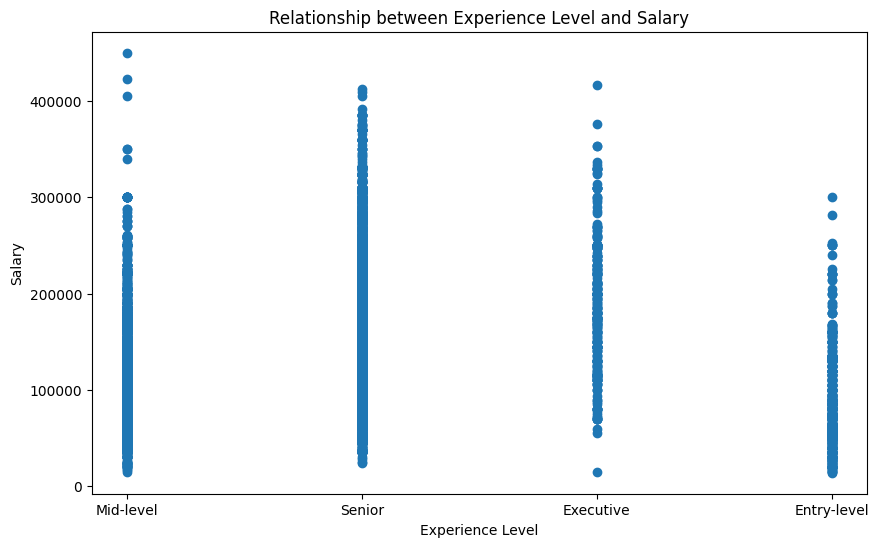

In [36]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['experience_level'], df['salary'])
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.title('Relationship between Experience Level and Salary')
plt.show()